In [25]:
#https://github.com/iuliazidaru/qiskit-certification-resources/tree/main/notebooks/5_compare_and_contrast_quantum_information
#https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html

#https://qiskit.org/documentation/stubs/qiskit.circuit.ClassicalRegister.html

#https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-05-30 10:14:15,061: Credentials are already in use. The existing account in the session will be replaced.


In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
ca = ClassicalRegister(1, 'cancilla')

qc = QuantumCircuit(qr, anc, cr, ca)

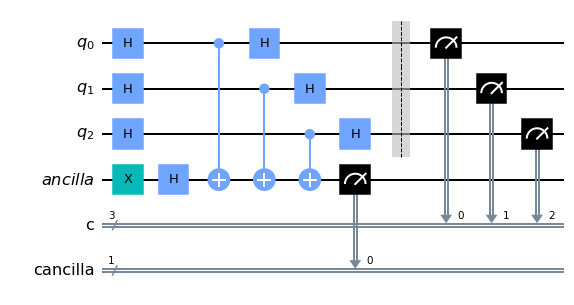

In [27]:
qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)
qc.measure(anc[0], ca[0])
qc.draw()

In [28]:
qc.qasm(formatted=True,filename='my_circuit.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
qreg ancilla[1];
creg c[3];
creg cancilla[1];
x ancilla[0];
h ancilla[0];
h q[0];
h q[1];
h q[2];
cx q[0],ancilla[0];
cx q[1],ancilla[0];
cx q[2],ancilla[0];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure ancilla[0] -> cancilla[0];



In [30]:
q=QuantumCircuit.from_qasm_file('my_circuit.qasm')

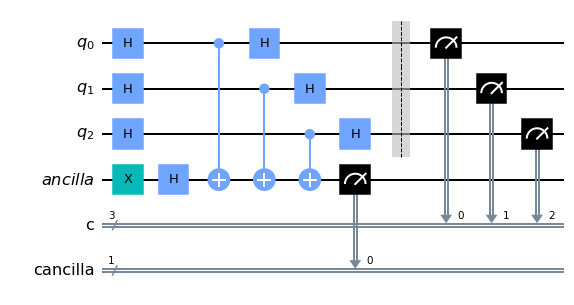

In [32]:
q.draw()

In [23]:
job = execute(qc, backend=BasicAer.get_backend('qasm_simulator'))

counts = job.result().get_counts()

In [24]:
print(counts)

{'0 111': 523, '1 111': 501}


In [7]:
qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')


qc = QuantumCircuit(qr, anc)


qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure_all()


job = execute(qc, backend=BasicAer.get_backend('qasm_simulator'))

counts = job.result().get_counts()

In [8]:
print(counts)

{'0111': 539, '1111': 485}


In [32]:
# Example To create a Bell Circuit

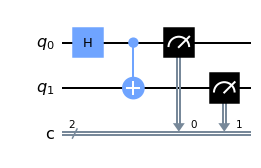

In [33]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw()

In [34]:
#Construct a 5 uqbit GHZ circuit

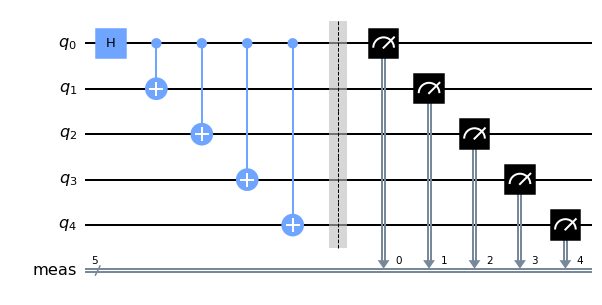

In [37]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1, 5))

qc.measure_all()
qc.draw()

In [38]:
#Construct a 4-qubit Bernstein-Vazirani circuit using registers

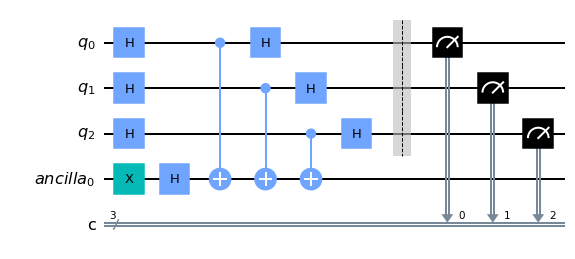

In [39]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)

qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)

qc.draw()

In [40]:
#Operators

In [41]:
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit
import qiskit.circuit.library as qulib

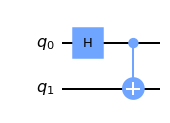

In [42]:
qc_hp4 = QuantumCircuit(2)
qc_hp4.h(0)
qc_hp4.cx(0,1)
qc_hp4.draw('mpl')

In [43]:
unitary_hp4_1 = qi.Operator(qc_hp4)
print(unitary_hp4_1.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


In [44]:
unitary_hp4_2 = qi.Operator.from_label('II').compose(qulib.HGate(), [0]).compose(qulib.CXGate(), [0, 1])
print(unitary_hp4_2.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


In [45]:
unitary_hp4_3 = qi.Operator.from_label('HI') + qi.Operator.from_label('CX')
print(unitary_hp4_3.data)

Traceback (most recent call last):
  File "/tmp/ipykernel_77/1213866729.py", line 1, in <module>
    unitary_hp4_3 = qi.Operator.from_label('HI') + qi.Operator.from_label('CX')
  File "/opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/operators/operator.py", line 193, in from_label
    raise QiskitError("Label contains invalid characters.")
QiskitError: 'Label contains invalid characters.'

Use %tb to get the full traceback.


In [46]:
unitary_hp4_4 = qi.Operator.from_label('II').compose(qc_hp4)
print(unitary_hp4_4.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


In [1]:
#Fidelity

In [8]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np

In [9]:
sv = Statevector.from_label('0')
new_sv = Statevector.from_label('0')

print(sv)
print(new_sv)
state_fidelity(new_sv, sv)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


1.0

In [11]:
circuit = QuantumCircuit(1)
circuit.x(0)
print(sv)
print(new_sv)

#sv = Statevector.from_label("0")
#new_sv = sv.evolve(circuit)


state_fidelity(new_sv, sv)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


0.0

In [12]:
circuit = QuantumCircuit(1)
circuit.h(0)


sv = Statevector.from_label("0")
new_sv = sv.evolve(circuit)
print(sv)
print(new_sv)

state_fidelity(new_sv, sv)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


0.4999999999999999

In [13]:
circuit = QuantumCircuit(1)
circuit.h(0)

circuit_new = QuantumCircuit(1)
circuit_new.x(0)
circuit_new.h(0)

sv = Statevector.from_label("0").evolve(circuit)
new_sv = Statevector.from_label("0").evolve(circuit_new)
print(sv)
print(new_sv)

state_fidelity(new_sv, sv)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


0.0

In [7]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)

sv = Statevector.from_label("00").evolve(circuit)
new_sv = Statevector.from_label("00")
print(sv)
print(new_sv)

state_fidelity(new_sv, sv)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


0.2499999999999999

In [19]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a

#these differ only by a phase so the gate and process
#fidelities are expected to be 1
#op_a
#op_b

a = average_gate_fidelity(op_a,op_b)

a

1.0

In [9]:
b = process_fidelity(op_a, op_b)
a == b

True